# Task 3. Algorithms for unconstrained nonlinear optimization. First- and second-order methods
## Alexandra Matveeva J4134c


In [23]:
# Gradient Descent
# Non-linear Conjugate Gradient Descent
# Newton's method
# Levenberg-Marquardt algorithm

In [24]:
import random
import numpy as np
from scipy import optimize
from autograd import jacobian
import matplotlib.pyplot as plt
from functools import partial
from sympy import *

In [25]:
eps = 1e-3

In [26]:
alpha, beta = random.random(), random.random()
print(alpha, beta)

0.9486786223502881 0.2653663569563065


In [27]:
# noisy data generation
x = []
yk = []
y_init = []
for k in range(101):
    x.append(k / 100)
    y_init.append(alpha * x[k] + beta)
    yk.append(y_init[k] + np.random.normal(0, 1))
x = np.array(x)
yk = np.array(yk)
y_init = np.array(y_init)

In [28]:

# linear approximation function

def linear_approx_func(x, a, b):
    y = []
    for i in range(101):
        y.append(a * x[i] + b)
    return np.array(y)

In [29]:
# rational approximation function

def rational_approx_func(x, a, b):
    y = []
    for i in range(101):
        y.append(a / (1 + b * x[i]))
    return np.array(y)

In [30]:
def least_squares_linear(params, y_f, x):
    a, b = params
    return np.sum((linear_approx_func(x, a, b) - y_f) ** 2)

In [31]:
def least_squares_rational(params, y_f, x):
    a, b = params
    return np.sum((rational_approx_func(x, a, b) - y_f) ** 2)

In [32]:
 # partial der a

def partial_der_a(x, y, a, b, func_type):
  sum = 0
  if (func_type == 'linear'):
    for k in range(101):
      sum += 2 * x[k] * (a * x[k] + b - y[k])
  else:
    for k in range(101):
      sum += 2 * (a / (1 + b * x[k]) - y[k]) * 1 / (1 + b * x[k])
  return sum

In [33]:
# partial der b

def partial_der_b(x, y, a, b, func_type):
  sum = 0 
  if (func_type == 'linear'):
    for k in range(101):
      sum += 2 * (a * x[k] + b - y[k])
  else:
    for k in range(101):
      sum += 2 * (a / (1 + b * x[k]) - y[k]) * (- a * x[k]) / (1 + b * x[k]) ** 2
  return sum


In [80]:
def gradient_descent(x, y, func_type):
    a, b = 0.4, -0.6
    beta = 1e-2
    iter = 0
    f_calls = 0
    iter_max = 1000
    while True:
        prev_a, prev_b = a, b
        if func_type == 'linear':
            a = a - beta * 2 * sum(x * (a * x + b - y))
            b = b - beta * 2 * sum(a * x + b - y)
        elif func_type == 'rational':
            a = a - beta * 2 / len(x) * sum((a / (1 + b * x) - y) * 1 / (1 + b * x))
            b = b - beta * (-2) / len(x) * sum(a * x * (a - y * (b * x + 1)) / (b * x + 1) ** 3)
        iter += 1
        f_calls += 1
        if (((a - prev_a) ** 2 + (b - prev_b) ** 2) ** 0.5 < eps) or (iter >= iter_max):
            break

    return a, b, iter, f_calls

For linear

In [46]:
# Linear Gradient Descent
linear_params_grad = gradient_descent(x, yk, 'linear')

In [49]:
# Non-linear Conjugate Gradient Descent
linear_params_conj_grad = optimize.minimize(least_squares_linear, [0, 0], args=(yk, x), method='CG', tol=eps)

In [52]:
# Newton's methods

linear_params_newton = optimize.minimize(least_squares_linear, [0, 0], args=(yk, x), method='Newton-CG', jac=jacobian(least_squares_linear), tol=eps)

In [55]:
# Levenberg-Marquardt algorithm
def linear_reseduals(params, yk, x): 
  a, b = params
  res = np.zeros(len(x))
  for i in range(len(x)):
    res[i] = (a * x[i] + b) - yk[i]
  return res

linear_params_lm = optimize.least_squares(linear_reseduals, [0, 0], args=(yk, x), method='lm', xtol=eps)


In [54]:
print('Linear approximation:')
print('Linear Gradient Descent:', f'a = {linear_params_grad[0]} b = {linear_params_grad[1]}')
print('Non-linear Conjugate Gradient Descent:', f'a = {linear_params_conj_grad.x[0]} b = {linear_params_conj_grad.x[1]}')
print("Newton's methods: ", f'a = {linear_params_newton.x[0]} b = {linear_params_newton.x[1]}')
print('Levenberg-Marquardt algorithm:', f'a = {linear_params_lm.x[0]} b = {linear_params_lm.x[1]}')

Linear approximation:
Linear Gradient Descent: a = 0.8555408090322413 b = 0.2900314995991977
Non-linear Conjugate Gradient Descent: a = 0.8583332783885913 b = 0.28882881640992464
Newton's methods:  a = 0.8583332533346696 b = 0.28882883878089954
Levenberg-Marquardt algorithm: a = 0.8583332560264156 b = 0.28882883742213394


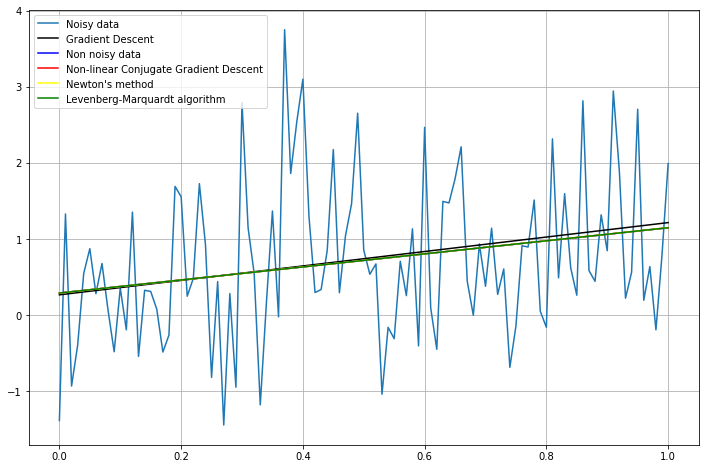

In [59]:
y_linear_opt_grad = []
for i in range(101):
    y_linear_opt_grad.append(linear_params_grad[0] * x[i] + linear_params_grad[1])

y_linear_opt_conj_grad = []
for i in range(101):
    y_linear_opt_conj_grad.append(linear_params_conj_grad.x[0] * x[i] + linear_params_conj_grad.x[1])

y_linear_opt_newton = []
for i in range(101):
    y_linear_opt_newton.append(linear_params_newton.x[0] * x[i] + linear_params_newton.x[1])
    
y_linear_opt_lm = []
for i in range(101):
    y_linear_opt_lm.append(linear_params_lm.x[0] * x[i] + linear_params_lm.x[1])

plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, yk)
plt.plot(x, y_init, color='black')
plt.plot(x, y_linear_opt_grad, color='blue')
plt.plot(x, y_linear_opt_conj_grad, color='red')
plt.plot(x, y_linear_opt_newton, color='yellow')
plt.plot(x, y_linear_opt_lm, color='green')
plt.legend(['Noisy data', 'Gradient Descent', 'Non noisy data', 'Non-linear Conjugate Gradient Descent', "Newton's method", 'Levenberg-Marquardt algorithm'])
plt.show()

For rational

In [86]:
# Linear Gradient Descent
rational_params_grad = gradient_descent(x, yk, 'rational')

In [85]:
# Non-linear Conjugate Gradient Descent
rational_params_conj_grad = optimize.minimize(least_squares_rational, [0, 0], args=(yk, x), method='CG', tol=eps)

In [87]:
# Newton's methods
rational_params_newton = optimize.minimize(least_squares_rational, [0, 0], args=(yk, x), method='Newton-CG', jac=jacobian(least_squares_rational), tol=eps)

In [84]:
# Levenberg-Marquardt algorithm
def rational_reseduals(params, yk, x): 
  a, b = params
  res = np.zeros(len(x))
  for i in range(len(x)):
    res[i] = (a / (1 + b * x[i])) - yk[i]
  return res

rational_params_lm = optimize.least_squares(rational_reseduals, [0, 0], args=(yk, x), method='lm', xtol=eps)

In [83]:
print('Rational approximation:')
print('Gradient Descent:', f'a = {rational_params_grad[0]} b = {rational_params_grad[1]}')
print('Non-linear Conjugate Gradient Descent:', f'a = {rational_params_conj_grad.x[0]} b = {rational_params_conj_grad.x[1]}')
print("Newton's methods: ", f'a = {rational_params_newton.x[0]} b = {rational_params_newton.x[1]}')
print('Levenberg-Marquardt algorithm:', f'a = {rational_params_lm.x[0]} b = {rational_params_lm.x[1]}')

Rational approximation:
Gradient Descent: a = 0.44482525511030413 b = -0.6217851279144735
Non-linear Conjugate Gradient Descent: a = 0.472361332943737 b = -0.6030286933037283
Newton's methods:  a = 0.4723605026573971 b = -0.6030299191570843
Levenberg-Marquardt algorithm: a = 0.47237095369247195 b = -0.6030125412867636


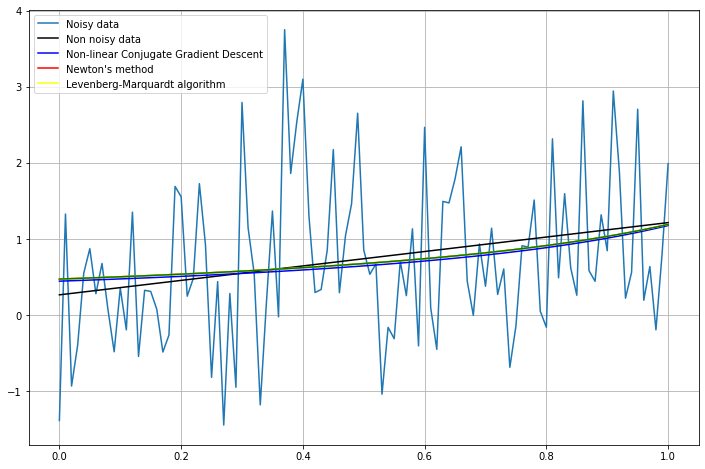

In [82]:
y_rational_opt_grad = []
for i in range(101):
    y_rational_opt_grad.append(rational_params_grad[0] / (1 + rational_params_grad[1] * x[i]))

y_rational_opt_conj_grad = []
for i in range(101):
    y_rational_opt_conj_grad.append(rational_params_conj_grad.x[0] / (1 + rational_params_conj_grad.x[1] * x[i]))

y_rational_opt_newton = []
for i in range(101):
    y_rational_opt_newton.append(rational_params_conj_grad.x[0] / (1 + rational_params_conj_grad.x[1] * x[i]))
    
y_rational_opt_lm = []
for i in range(101):
    y_rational_opt_lm.append(rational_params_conj_grad.x[0] / (1 + rational_params_conj_grad.x[1] * x[i]))

plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, yk)
plt.plot(x, y_init, color='black')
plt.plot(x, y_rational_opt_grad, color='blue')
plt.plot(x, y_rational_opt_conj_grad, color='red')
plt.plot(x, y_rational_opt_newton, color='yellow')
plt.plot(x, y_rational_opt_lm, color='green')
plt.legend(['Noisy data', 'Non noisy data', 'Non-linear Conjugate Gradient Descent', "Newton's method", 'Levenberg-Marquardt algorithm'])
plt.show()